# Image Compression Using KMeans Clustering
The goal of this project is sto reduce the size of the imagesand reduce sorage space.

# KMeans Clustering Algorithm
KMeans Algorithm is one of **Unsupervised Learning Algorithm** . It is algorithm for clustering where data points that are in the same group exhibit similar features. It consist of k clusters where the algorithm tries to fit the data point in exactly one cluster.These are the following steps that are being performed in this algorithm:
- Specify the number of clusters k.
- Initialize centroid by randaomly selecting k data points.
- Keep iterating util there is n change in the centroid i.e. assignment of data pointsto the clusters.
- Compute sum of the squared distance (Euclidean Distance) between data points and the distance
- Assign each data point to the clusterwhere the distance is minimum.
- Compute the centroid for the clusters by taking the average of all the data points that belong to a cluster.<br>
Hence, KMeans tries to simultaneously<br>1. Minimize the distance between points in a cluster.<br>2. Maximize the distance between clusters.<br> Sometimes the KMeans get stuck in local minima and cannot converge to the global minima for that we can try initializing the K value for number of times and choose the value with lowest sum of square error.<br>**Choosing the value of k:<br>Elbow Method:** It plots the number of clusters vs Sum of square error(SSE), where SSE=$\sum_(i=0)^ndist(x_i-c_i)^2+\sum_(i=1)^ndist(x_i-c_i)^2 --$, and picking the elbow of the curve as the number of clusters(k) to use.
As the cluster size increases the SSE becomes zero.

### Compression
In a coloured image, each pixel is of size 3 bytes (RGB), where each colour can have intensity values from 0 to 255. Their are total combinaitons of 256*256*256. Our eyes can visualize atmost 8-10 colors of a image, therefore rest pixels are just a waste. K-means clustering will group similar colors together into ‘k’ clusters (k=64) of different colors (RGB values). Therefore, each cluster centroid is the representative of the color vector in RGB color space of its respective cluster. Now, these ‘k’ cluster centroids will replace all the color vectors in their respective clusters. Thus, we need to only store the label for each pixel which tells the cluster to which this pixel belongs. Additionally, we keep the record of color vectors of each cluster center.

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
from sklearn.cluster import KMeans

### Loading the image

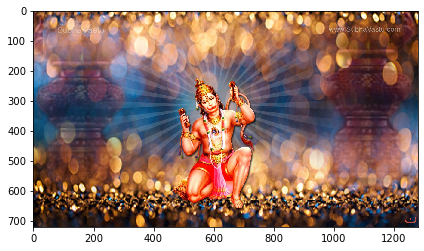

In [2]:
img=io.imread("hanumanji (3).jpg")
io.imshow(img)
io.show()

In [3]:
img.shape

(720, 1280, 3)

The image is 3-dimension of size 271*186. <br>Making the first dimension as row and second as column

In [4]:
rows=img.shape[0]
columns=img.shape[1]
print("rows:{} column:{}".format(rows,columns))

rows:720 column:1280


We need to reshape the image because KMeans works on 2-Dimensional array. <br> Using reshapeto conert 3D to 2D where -1 signify 720*1280.

In [5]:
#reshaping the image
img=img.reshape(-1,3)
print (img.shape)

(921600, 3)


Performing the KMeans Clustering Algorithm

In [6]:
km=KMeans(n_clusters=64,max_iter=100)
km.fit(img)

KMeans(max_iter=100, n_clusters=64)

We have passed n_clusters=64, this means all the colour combinations in the original image have been quantized to 64 distinct colours only. 

In [16]:
#Printing the total 64 clusters
print(km.cluster_centers_)

[[239.42560903 168.59893048 112.34135472]
 [ 50.3353015   61.79854944  89.45032312]
 [146.37771346  83.85540804  51.38054489]
 [ 48.14585872  28.62037232  35.36500399]
 [159.03802076 121.53282999 122.30376163]
 [244.39692911 108.24518131  48.34090167]
 [243.96127563 179.44681439 139.91081659]
 [112.19106985  58.04885057  29.15159151]
 [112.52086221  84.05090092  94.80112795]
 [119.530104   150.09578544 194.17077176]
 [189.87722801 118.75538286  49.30742906]
 [ 44.06937444  99.32285799 142.10574167]
 [198.40115662 139.00029505 100.97061253]
 [ 95.65374677  53.36969697  50.92929293]
 [242.4549483   16.93078709   8.99978899]
 [ 82.47356635 101.87333268 134.50968747]
 [ 15.14505351   8.93660021  12.21882979]
 [ 46.43205863  47.29898611  70.26895526]
 [161.21024602 105.50485437  92.92430955]
 [184.62930386 154.90279657 158.26402045]
 [231.48001567 155.00254702  48.64733542]
 [250.91258203 220.09730211 173.16260228]
 [ 65.82023028  31.79711939  17.80149395]
 [190.25607886  39.11719606   9.27

In [8]:
clusters=np.asarray(km.cluster_centers_,dtype='uint8')
labels=np.asarray(km.labels_,dtype='uint8')
labels=labels.reshape(rows,columns)

In [9]:
np.save('codebook_img.npy',clusters)
io.imsave("compressed_img.jpg",labels)

'Codebook_img' is  given to the list of cluster centers which is achieved after running k-means algorithm. 

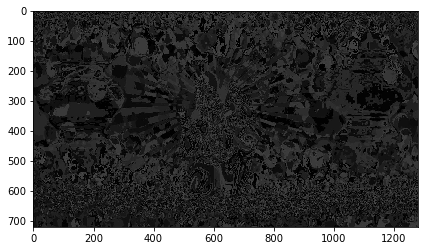

In [15]:
io.imshow("compressed_img.jpg")
io.show()

This is the compressed image which we get after performing the KMeans algorithm of size 165KB